Cho dataset: homedata.csv.
Dựa vào dữ liệu của các cột:
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
Dùng Machine Learning Model – LinearRegression() và phương pháp học máy có giám
sát, để dự đoán SalePrice của một input bất kỳ.
1. Thực hiện các bước Data Preprocessing cần thiết cho X_train và Y_train (chiếm
80% dữ liệu homedata)
2. Dùng ML model – LinearRegression() để training với phương pháp học máy có
giám sát.
3. Giả sử X_test là dữ liệu đầu vào để kiểm tra model huấn luyện (X_test chiếm
20% của dữ liệu homedata), sau đó nhận được đầu ra Y_predict. Vẽ Y_predict
và Y_test trong cùng 1 hình (ghi chú legend, trục X (là “Id” của X_test trong
dataset), trục Y, title), trong đó Y_test (tương ứng với X_test) là dữ liệu
SalePrice của homedata và chiếm 20%.

In [112]:
import pandas as pd

df  = pd.read_csv('homedata.csv')

# Các cột quan trọng để xây dựng mô hình
df = df[["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd", "SalePrice"]]

print(df)

for col in df.columns:
    miss_data = df[col].isna().sum()

    if(miss_data != 0) :
        print('{} in column {}'.format(miss_data,col))

      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
2       11250       2001       920       866         2             3   
3        9550       1915       961       756         1             3   
4       14260       2000      1145      1053         2             4   
...       ...        ...       ...       ...       ...           ...   
1455     7917       1999       953       694         2             3   
1456    13175       1978      2073         0         2             3   
1457     9042       1941      1188      1152         2             4   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  SalePrice  
0                8     208500  
1                6     181500  
2                6     223500  
3      

In [113]:
from sklearn.impute import SimpleImputer

X = df.iloc[:,0:7].values
Y = df.iloc[:,7].values

print(X)

# Thay thế các giá trị value = 0 thành giá trị trung bình
# imputer = SimpleImputer(missing_values=0, strategy="mean")
# imputer.fit(X[:,0:7])

# X[:,0:7] = imputer.transform(X[:,0:7])
# print(X)

[[ 8450  2003   856 ...     2     3     8]
 [ 9600  1976  1262 ...     2     3     6]
 [11250  2001   920 ...     2     3     6]
 ...
 [ 9042  1941  1188 ...     2     4     9]
 [ 9717  1950  1078 ...     1     2     5]
 [ 9937  1965  1256 ...     1     3     6]]


In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print('X_train: {}'.format(X_train))
print('X_test: {}'.format(X_test))
print('Y_train: {}'.format(Y_train))
print('Y_test: {}'.format(Y_test))


X_train: [[ 8777  1900  1272 ...     2     4     9]
 [10800  1900   694 ...     2     3     7]
 [ 8767  2005  1310 ...     2     3     6]
 ...
 [ 6882  1914   773 ...     1     3     7]
 [ 1680  1971   483 ...     1     2     5]
 [18000  1935   894 ...     1     2     6]]
X_test: [[12435  2001   963 ...     2     3     7]
 [ 8400  1939  1052 ...     2     4     8]
 [ 9819  1967   900 ...     1     3     5]
 ...
 [10800  1927   968 ...     2     4     5]
 [10625  1920   835 ...     1     2     5]
 [10800  2007  1050 ...     2     3     8]]
Y_train: [145900 106250 164990 ... 127000  89500  81000]
Y_test: [231500 179500 122000  84500 142000 325624 285000 151000 195000 275000
 175000  61000 174000 385000 230000  87000 125000  98600 260000 143000
 124000 122500 236500 337500  76000 187000 128000 179000 485000 122500
 106000 118000 127000  80000 153000 360000 132000  85500 262280 112000
 131000 139000  87000 135000 181000 163500 116900 159895 244600 294000
  97000 295000 120500 239500 194000

In [193]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)
print(X_test_scaler)

[[ 0.19172366  0.96579268 -0.53948393 ...  0.78430432  0.15590628
   0.27752718]
 [-0.21701974 -1.0818371  -0.31433455 ...  0.78430432  1.3780441
   0.89261588]
 [-0.07327578 -0.15710107 -0.69885933 ... -1.04783057  0.15590628
  -0.95265022]
 ...
 [ 0.02609901 -1.47815254 -0.52683509 ...  0.78430432  1.3780441
  -0.95265022]
 [ 0.0083716  -1.70933655 -0.86329427 ... -1.04783057 -1.06623154
  -0.95265022]
 [ 0.02609901  1.1639504  -0.31939408 ...  0.78430432  0.15590628
   0.89261588]]


In [194]:
from sklearn.linear_model import LinearRegression

# Chọn model LinearRegression
model = LinearRegression()
# fit training data into model
model.fit(X_train,Y_train)
# test với X_test

Y_predict = model.predict(X_test)
print(Y_predict)


[223824.99738275 158038.21582391 108984.72754187 101842.89785072
 140651.37555649 278466.39369167 278834.7169265  156208.12864734
 222349.12809287 228746.62164596 192607.48990336  97531.61753468
 244580.46484761 295678.36598072 226685.94112722 128483.99487249
 105844.88922215 163910.2695425  231374.28163327 144015.51135007
 135625.28801488 178907.29834956 226505.96747697 246875.5229427
  81973.90273425 196370.48919715 105554.81328497 193831.67040846
 372850.53256741 162784.34153318 209780.18596624 138698.41277848
 107975.33327349 101470.23885732 137803.2942227  274996.09041549
 117876.23795539  76982.61478319 273832.66509035 115973.74815209
 182849.78960879 155909.14049588  92663.64774102 104066.17014475
 212581.89964498 209466.12285139  94706.56363632 207053.90548224
 213645.71414998 262964.83758063 110849.5869054  292961.09117984
  82864.19680768 246470.38640802 199272.43458449  97855.70373392
 117523.90213949 188413.45409714 139672.45601321 204281.63631709
 177330.62960008 274356.24

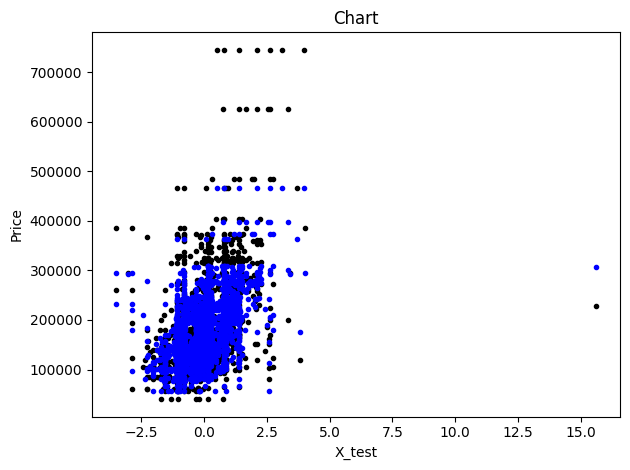

In [216]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X_test_scaler, Y_test, '.', color = 'black')
plt.plot(X_test_scaler, Y_predict, '.', color = 'blue')
plt.title('Chart')
plt.xlabel('X_test')
plt.ylabel('Price')
plt.tight_layout()
plt.show()